# 🛳️ Titanic Disaster Survival Analysis

## Problem Statement & Analytical Questions

### ❓Problem
- Who survived and who did not survive the Titanic disaster?
- Who would have a higher chance of surviving the Titanic disaster?

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random as rnd

%matplotlib inline

In [5]:
!pip install matplotlib
!pip install seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 5.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 5.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 7.4 MB/s eta 0:00:00a 0:00:01


In [3]:
!pip install pandas
!pip install numpy

  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 3.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 3.0 MB/s eta 0:00:0000:0100:01
Using cached tzdata-2025.2-py2.py3-none-any.whl (347 kB)


In [7]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
combine = [train_df,test_df]

In [8]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [9]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

In [11]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


- Survived is a categorical feature with 0 or 1 values.
- Around 38% samples survived representative of the actual survival rate of 32%
- Most passengers (>75%) did not travel with parents or children
- Few elderly passengers <1% within age range 65-80

In [12]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


- Names are unique across the dataset
- Sex variable as 2 possible values with 65% male
- Cabin values have several duplicates across samples. Alternatively several passengers shared a cabin
- Embarked takes 3 possible values. S port used by most passengers
- Ticket features has high ratio (22%) of duplicate values

## EDA

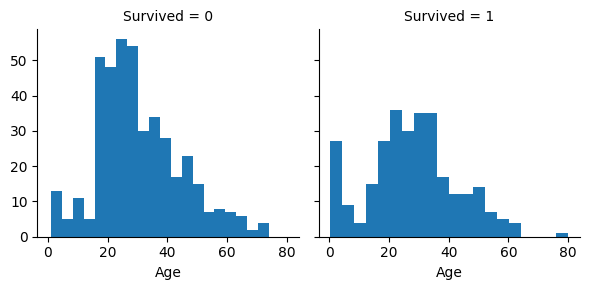

In [13]:
g = sns.FacetGrid(train_df,col='Survived')
g.map(plt.hist,'Age',bins=20)

- Infants (Age <= 4) had high survival rate
- Oldest passengers (Age=80) survived
- Large number of 15-25 years old did not survive
- Most passengers are in 15-35 age range

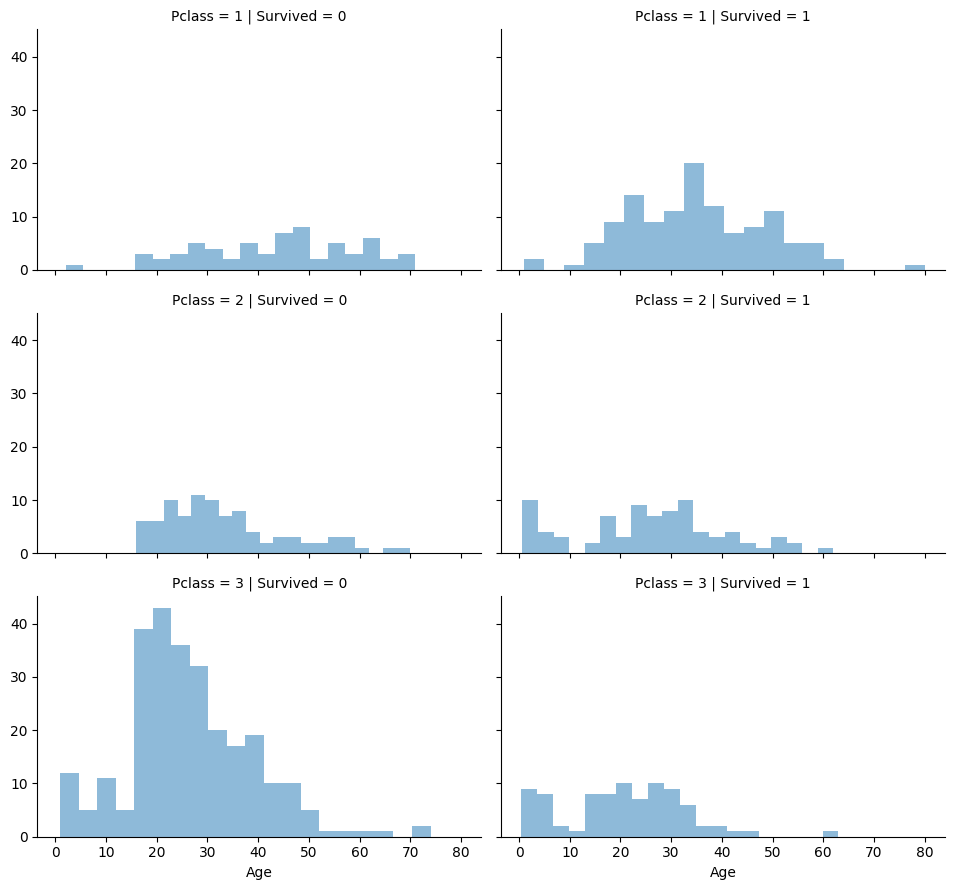

In [14]:
grid=sns.FacetGrid(train_df,col='Survived',row='Pclass',aspect=1.6)
grid.map(plt.hist,'Age',alpha=.5,bins=20)
grid.add_legend()

- Pclass=3 has most passengers, however most did not survive
- Infant passengers in Pclass=2 and =3 mostly survived
- Most passengers in Pclass=1 survived

/opt/miniconda3/lib/python3.13/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/opt/miniconda3/lib/python3.13/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/opt/miniconda3/lib/python3.13/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/opt/miniconda3/lib/python3.13/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/opt/miniconda3/lib/python3.13/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/opt/minic

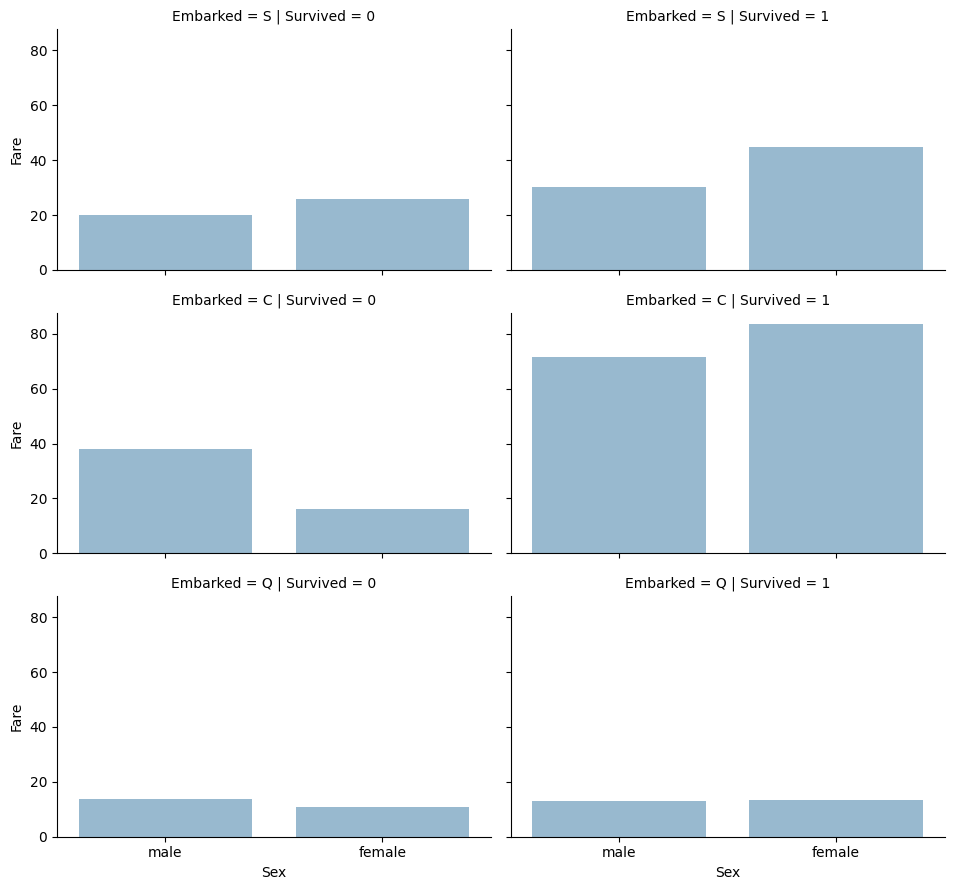

In [15]:
grid=sns.FacetGrid(train_df,col='Survived',row='Embarked',aspect=1.6)
grid.map(sns.barplot,'Sex','Fare',alpha=.5,ci=None)
grid.add_legend()

- Fares and Pclass are strongly correlated with survival
- Embarked reflects disparities in economic conditions and survival chances
- Females generally have higher survival rates, especially in rich ports S and C

In [16]:
df_numeric=train_df.select_dtypes(include=['number'])
df_numeric.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


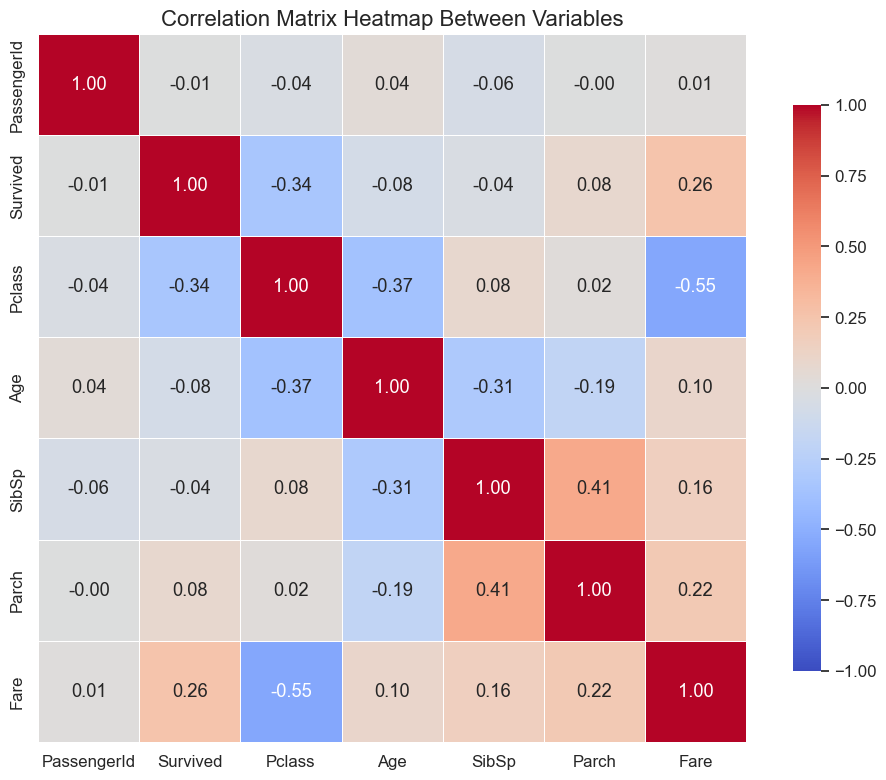

In [17]:
plt.figure(figsize=(10,8))
sns.set(font_scale=1.1)

sns.heatmap(
    df_numeric.corr(),
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    vmin=-1,vmax=1,
    linewidths=0.5,
    linecolor='white',
    square=True,
    cbar_kws={"shrink":0.8}
)

plt.title('Correlation Matrix Heatmap Between Variables', fontsize=16)
plt.tight_layout()
plt.show()

Col 1: Passenger ID
- Correlation values close to 0 with all other variables -> no meaningful relationship
- This is expected because PassengerId is just an identifier, unrelated to survival chances

Col 2: Survived (Target Variable)
- **Survived vs Pclass (-0.34) -> Moderate negative correlation**: Lower class passengers (high Pclass values) were less likely to survive
- **Survived vs Fare (0.26) -> Weak positive correlation**: Higher fare-paying passengers had a higher chance of survival
- **Survived vs Age (-0.08) -> Very weak negative correlations**: Younger passengers slightly more likely to survive
- **Survived vs SibSp/Parch -> Very weak correlations**: Little direct impact from number of family members abroad
- **Pclass and Fare** are the most influential features related to survival

Col 3: Pclass
- **Pclass vs Fare** -> Strong negative correlation: Lower-class passengers paid lower fares 
- **Pclass vs Age** -> Lower-class passengers tended to be younger

Col 4: Age
- **Age vs SibSp** -> Older passengers less likely to travel with siblings/spouses
- **Age vs Parch** -> Older passengers less likely to travel with children/parents

Col 5: SibSp vs Parch
- Correlation of 0.415 -> Parents traveling with siblings/spouses also often traveled with parents/children

Col 6: Fare
- Weak positive correlations with Parch and Sibsp
- Possibly indicates families with more members booked higher-priced tickets

## Data Cleaning & Feature Engineering

In [18]:
# Extract Title from Name
train_df['Title']=train_df.Name.str.extract(' ([A-Za-z]+)\.',expand=False)
train_df.head()

<>:2: SyntaxWarning: invalid escape sequence '\.'
<>:2: SyntaxWarning: invalid escape sequence '\.'
/var/folders/hr/9lr_73qj23x58vg0r_py79q40000gn/T/ipykernel_4559/2118031617.py:2: SyntaxWarning: invalid escape sequence '\.'
  train_df['Title']=train_df.Name.str.extract(' ([A-Za-z]+)\.',expand=False)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [19]:
# Replace value
train_df['Title'] = train_df['Title'].replace(['Lady','Countess','Capt','Col',\
                                              'Don','Dr','Major','Rev','Sir','Jonkheer','Dona'],'Others')

train_df['Title'] = train_df['Title'].replace('Mlle','Miss')
train_df['Title'] = train_df['Title'].replace('Ms','Miss')
train_df['Title'] = train_df['Title'].replace('Mme','Mrs')

In [22]:
train_df[['Title','Survived']].groupby(['Title'],as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Others,0.347826


## Key Findings

1. Gender plays a critical role in survival chances
- Female had significantly higher survival rates than males
- This aligns with the historical "women and children first" evacuation priority

2. Passenger class (Pclass) strongly affects survival
- 1st class passengers had the highest survival rates
- 3rd class passengers had the lowest survival rates
- Correlation: Survived vs Pclass = -0.338 (moderate negative correlation)

3. Fare positively correlates with survival
- Higher paying passengers were more likely to survive
- Correlation: Survived vs Fare = 0.257

4. Age has a weak but notable impact
- Infants (<4) had high survival rates
- Elderly passengers had lower survival rates, but with some exceptions
- Correlation: Survived vs Age = -0.077

5. Embarkation ports show socio-economic disparities
- Most passengers embarked from Southampton
- Passengers from Cherbourg had higher survival rates
- Reflects economic conditions influencing survival chances

6. Dataset representativeness
- Dataset covers ~ 40% of actual Titanic passengers (891 out of 2224)
- Survival rate in dataset (38%), close to historical 32% -> good representativeness

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 3.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 4.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.2/731.2 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.2/21.2 MB 4.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 4.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.3/32.3 MB 4.5 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: tenacity
    Found existing installation: tenacity 8.0.1
    Uninstalling tenacity-8.0.1:
      Successfully uninstalled tenacity-8.0.1
  Attempting uninstall: numpy90m━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━  2/16 [pyarrow]
    Found existing installation: numpy 1.21.5━━━━━━━━━━━━━━━━━  2/16 [pyarrow]
    Uninstalling numpy-1.21.5:━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━  3/16 [numpy]
      Successfully uninstalled numpy-1.21.5━━━━━━━━━━━━━━━━━━━  3/16 [numpy]
  Attempting u

    Uninstalling ipywidgets-7.6.5:m╸━━━━━━━━━━━━ 11/16 [streamlit]
      Successfully uninstalled ipywidgets-7.6.590m━━━━━━━━━━━━ 11/16 [streamlit]
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16/16 [streamlit_jupyter]amlit]
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.6.0 requires daal==2021.4.0, which is not installed.
numba 0.55.1 requires numpy<1.22,>=1.18, but you have numpy 2.0.2 which is incompatible.
scipy 1.9.1 requires numpy<1.25.0,>=1.18.5, but you have numpy 2.0.2 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [28]:
pip install joblib

Note: you may need to restart the kernel to use updated packages.


In [31]:
import streamlit as st
import pandas as pd
import numpy as np
import joblib

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [33]:
train_df['Title'] = train_df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
train_df['Title'] = train_df['Title'].replace(['Mlle', 'Ms'], 'Miss').replace(['Mme'], 'Mrs')
train_df['Title'] = train_df['Title'].apply(lambda x: x if x in ['Mr', 'Mrs', 'Miss', 'Master'] else 'Other')

In [34]:
train_df['Sex'] = LabelEncoder().fit_transform(train_df['Sex'])
train_df['Embarked'] = train_df['Embarked'].fillna('S')
train_df['Embarked'] = LabelEncoder().fit_transform(train_df['Embarked'])
train_df['Title'] = LabelEncoder().fit_transform(train_df['Title'])

In [35]:
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].median())
train_df['Fare'] = train_df['Fare'].fillna(train_df['Fare'].median())

In [36]:
# Features and target
features = ['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked','Title']
X=train_df[features]
y=train_df['Survived']

In [37]:
# Train model
model=RandomForestClassifier(n_estimators=100,random_state=42)
model.fit(X,y)

RandomForestClassifier(random_state=42)

In [40]:
joblib.dump(model,'titanic_model.joblib')

['titanic_model.joblib']

In [41]:
y_pred=model.predict(X)
print(f'Train accuracy: {accuracy_score (y,y_pred):.4f}')

Train accuracy: 0.9820


In [42]:
# Load model
model = joblib.load('titanic_model.joblib')

In [45]:
st.title('🚢 Titanic Survival Prediction App')
st.sidebar.header('🧑‍💼 Passenger Information')

2025-05-17 23:12:26.459 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-17 23:12:26.461 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-17 23:12:26.463 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-17 23:12:26.464 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator(_root_container=1, _parent=DeltaGenerator())

In [46]:
# Inputs
Pclass = st.sidebar.selectbox('Ticket Class (1 = 1st, 2 = 2nd, 3 = 3rd)', [1, 2, 3])
Sex = st.sidebar.selectbox('Sex', ['male', 'female'])
Age = st.sidebar.slider('Age', 0, 100, 30)
SibSp = st.sidebar.slider('Number of Siblings/Spouses Aboard', 0, 10, 0)
Parch = st.sidebar.slider('Number of Parents/Children Aboard', 0, 10, 0)
Fare = st.sidebar.slider('Passenger Fare', 0.0, 600.0, 32.0)
Embarked = st.sidebar.selectbox('Port of Embarkation', ['S', 'C', 'Q'])
Title = st.sidebar.selectbox('Title', ['Mr', 'Mrs', 'Miss', 'Master', 'Other'])

2025-05-17 23:12:29.846 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-17 23:12:29.848 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-17 23:12:29.849 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-17 23:12:29.850 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-17 23:12:29.851 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-17 23:12:29.852 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-17 23:12:29.852 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-17 23:12:29.853 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [47]:
# Mapping encoding
Sex = 1 if Sex == 'male' else 0
Embarked = {'S': 2, 'C': 0, 'Q': 1}[Embarked]
Title = {'Mr': 2, 'Mrs': 3, 'Miss': 1, 'Master': 0, 'Other': 4}[Title]

In [61]:
# Predict button
if st.button('Predict Survival'):
    # Prepare data
    input_data = pd.DataFrame([[Pclass, Sex, Age, SibSp, Parch, Fare, Embarked, Title]],
                              columns=['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Title'])

    # Prediction
    prediction = model.predict(input_data)[0]
    probability = model.predict_proba(input_data)[0][prediction]

    result = '🟢 Survived' if prediction == 1 else '🔴 Did not survive'

    st.subheader('Prediction Result:')
    st.markdown(f'### {result}')
    st.write(f'Prediction Confidence: **{probability * 100:.2f}%**')

2025-05-17 23:15:57.765 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-17 23:15:57.767 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-17 23:15:57.768 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-17 23:15:57.769 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-17 23:15:57.770 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
